### 🧊 Pytorch Workflow - https://www.learnpytorch.io/01_pytorch_workflow/:
1. **Import Libraries**: Start by importing necessary libraries such as `torch`, `torchvision`, and any other required modules.
2. **Data Preparation**: Load and preprocess your dataset using `torchvision.datasets` and `torchvision.transforms`. Split the data into training, validation, and test sets.
3. **Define the Model**: Create a neural network model by subclassing `torch.nn.Module` and defining the layers in the `__init__` method and the forward pass in the `forward` method.
4. **Set Up Loss Function and Optimizer**: Choose an appropriate loss function (e.g., `torch.nn.CrossEntropyLoss`) and an optimizer (e.g., `torch.optim.SGD` or `torch.optim.Adam`) to update the model weights.
5. **Training Loop**: Implement the training loop where you iterate over the training data, perform forward passes, compute the loss, backpropagate the errors, and update the model weights using the optimizer.
6. **Validation Loop**: After each epoch, evaluate the model on the validation set to monitor performance and prevent overfitting.
7. **Testing**: Once the model is trained, evaluate its performance on the test set to assess its generalization capabilities.
8. **Save and Load Model**: Save the trained model using `torch.save()` and load it later with `torch.load()` for inference or further training.
9. **Inference**: Use the trained model to make predictions on new, unseen data by passing the data through the model and obtaining the output.
10. **Visualization and Analysis**: Optionally, visualize training metrics (like loss and accuracy) using libraries such as Matplotlib or TensorBoard to analyze the model's performance over time.

#### In Short:
![Workflow](images/pytorch-workflow.png)

In [1]:
!nvidia-smi

Wed Jan 21 17:43:29 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.9.0+cu126'

In [3]:
# Data preparing & loading and Can be anything:
#   1. Excel Spreadsheet 
#   2. Images
#   3. Videos
#   4. Audio
#   5. DNA
#   6. Text

# ML is a game of two parts:
#   1. Get data into numerical representation
#   2. Build a model to learn patterns in that numerical representation

# To showcase this lets create some "known" pattern using the linear regression to make a straing line with known **parameters** (parameter is something that a model learns)


### 🧊 What is linear regression?


In [4]:
# Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# A LR line has an equation of the form Y = a + bX ,where
#   X = explanatory variable
#   Y = dependent variable
#   b = slope line
#   a = intercept (value of y when x=0)

In [5]:
# Step - 1 Create *known* parameters

weight = 0.7
bias = 0.3

# Cre
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) 
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [6]:
# Step - 2 Splitting data into training and test sets (Each split = training set, Validation set, Training set)

train_split = int(0.8 * len(X)) #40 samples
X_train, y_train = X[:train_split], y[:train_split] # train set
X_test, y_test = X[train_split:], y[train_split:] # test set

len(X_train), len(y_train), len(X_test), len(y_test) #(40, 40, 10, 10)

(40, 40, 10, 10)

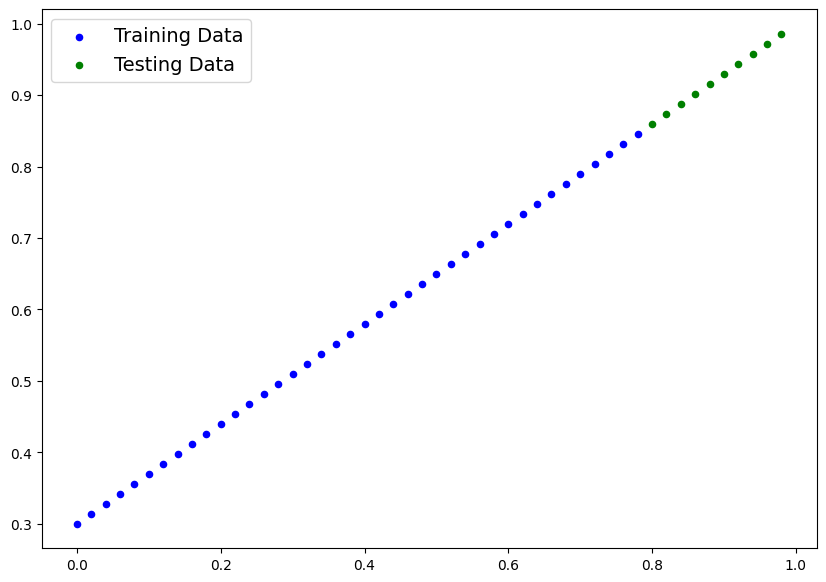

In [7]:
# Visualize the data
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels=y_test, predictions = None):
    """
    Plots training data, test data and compare prediction.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=20, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, label="Testing Data")

    # Predictions, if Any?
    if predictions is not None:
        # Plot predictions
        plt.scatter(test_data, predictions, c="r", s=20, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

plot_prediction()

In [8]:
# Step - 3 Building a model
# What the model does?
# --Start with random values (weight & bias). Look at training data and adjust the random values to better represent the ideal values (weight & bias values we used to create the data at first)

# How ?
# By Using 2 algorithms:
#   1. Gradient descent
#   2. Backpropagation

class LinearRegressionModel(nn.module):
    def __init__(self):
        super().__init__()

        #Initialize model params
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

        # Forward() method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor: # x = input data
            return self.weights * x + self.bias # linear regression

### pytorch model building essentials
# *torch.nn - contain all the building blocks for computational graphs (or NN)
# *torch.nn.Parameter  - what parameters should our model try an learn
# *torch.nn.Module - The base class for all NN modules
# *torch.optim -  this where the optimizers in Pytorch live, they will help with gradient descent


AttributeError: module 'torch.nn' has no attribute 'module'

In [ ]:
### Checking the contents of the model inside

# Manual Seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check params
list(model_0.paramaters())